In [111]:
import pandas as pd

In [112]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class = 0 -- Transanction is not fraud

Class = 1 -- Transanction is fraud

In [114]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### No Null Values

In [115]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [116]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [117]:
fraud = len(df[df['Class']==1])
genuine = len(df[df['Class']==0])
print('Fraud Transactions: ',fraud)
print('Normal Transactions: ',genuine)

Fraud Transactions:  492
Normal Transactions:  284315


In [118]:
import matplotlib.pyplot as plt

## Imbalanced Data

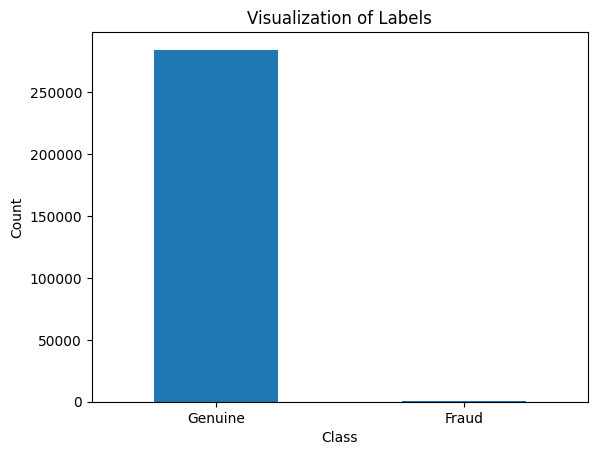

In [119]:
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [121]:
# Now apply Standard Scaler to scale the amount class

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(["Amount", "Time"], inplace= True, axis= 1)


In [122]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Model training

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = df.drop(["Class"], axis= 1)
y = df["Class"]

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [126]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

In [127]:
rdc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()

In [128]:
rdc.fit(X_train,y_train)
y_pred=rdc.predict(X_test)

In [129]:
dtc.fit(X_train,y_train)
y_pred1=dtc.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [131]:
print('For RandomForest classification')
print('Accuracy score: ',accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('F1 score: ',f1_score(y_test,y_pred))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred))
print('Classification_report: \n',classification_report(y_test,y_pred))

For RandomForest classification
Accuracy score:  0.9996488887328394
Precision score:  0.9416666666666667
Recall score:  0.8308823529411765
F1 score:  0.8828125
Confusion matrix: 
 [[85300     7]
 [   23   113]]
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.83      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [132]:
print('For Decision_tree')
print('Accuracy score: ',accuracy_score(y_test,y_pred1))
print('Precision score: ',precision_score(y_test,y_pred1))
print('Recall score: ',recall_score(y_test,y_pred1))
print('F1 score: ',f1_score(y_test,y_pred1))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred1))
print('Classification_report: \n',classification_report(y_test,y_pred1))

For Decision_tree
Accuracy score:  0.9991573329588147
Precision score:  0.7133333333333334
Recall score:  0.7867647058823529
F1 score:  0.7482517482517482
Confusion matrix: 
 [[85264    43]
 [   29   107]]
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.79      0.75       136

    accuracy                           1.00     85443
   macro avg       0.86      0.89      0.87     85443
weighted avg       1.00      1.00      1.00     85443



# Here there is imbalanced dataset problem 
### Let us solve this problem by oversampling (SMOTE)

In [133]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of y: ", y_resampled.shape)


Resampled shape of X:  (568630, 29)
Resampled shape of y:  (568630,)


In [134]:
X_resampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-2.046770,3.564217,-4.290093,2.697131,-2.076105,-2.465441,-3.978968,1.611070,-1.137010,-6.552113,...,0.457245,0.584249,-0.527096,0.014283,0.195908,0.076764,0.307608,0.545708,0.281371,-0.349231
568626,1.164409,2.449393,-4.847102,5.383107,0.885697,-1.230132,-1.306802,0.378197,-2.542290,-3.024544,...,0.219858,0.143328,-0.647769,-0.073730,-0.893156,0.320923,0.074135,0.483937,0.267174,-0.335280
568627,-1.022006,1.095719,-0.324821,1.376180,1.744578,-2.082929,0.502570,-0.090173,-0.136931,-2.497117,...,-0.173992,-0.338038,-0.844721,-0.343783,0.226885,0.468076,-0.498642,0.011416,0.134258,-0.349231
568628,-3.523047,2.069972,-2.574803,-0.258915,-1.815361,-1.626761,-1.376705,0.012335,0.245840,-3.514126,...,-0.629818,0.437988,-0.220391,-0.576471,0.258923,-0.502408,-1.024764,-0.808659,0.126030,0.271290


In [135]:
y_resampled.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [136]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_resampled, y_resampled,test_size=0.30,random_state=42)

In [137]:
rdc.fit(X_train1,y_train1)
y_pred_smote=rdc.predict(X_test1)
dtc.fit(X_train1,y_train1)
y_pred_smote1=dtc.predict(X_test1)

In [139]:
print('For Decison tree')
print('Accuracy score: ',accuracy_score(y_test1,y_pred_smote))
print('Precision score: ',precision_score(y_test1,y_pred_smote))
print('Recall score: ',recall_score(y_test1,y_pred_smote))
print('F1 score: ',f1_score(y_test1,y_pred_smote))
print('Confusion matrix: \n',confusion_matrix(y_test1,y_pred_smote))
print('Classification_report: \n',classification_report(y_test1,y_pred_smote))

print('For RandomForest Classification:')
print('Accuracy score: ',accuracy_score(y_test1,y_pred_smote1))
print('Precision score: ',precision_score(y_test1,y_pred_smote1))
print('Recall score: ',recall_score(y_test1,y_pred_smote1))
print('F1 score: ',f1_score(y_test1,y_pred_smote1))
print('Confusion matrix: \n',confusion_matrix(y_test1,y_pred_smote1))
print('Classification_report: \n',classification_report(y_test1,y_pred_smote1))

For Decison tree
Accuracy score:  0.9998886211889395
Precision score:  0.99977767116395
Recall score:  1.0
F1 score:  0.9998888232230733
Confusion matrix: 
 [[85130    19]
 [    0 85440]]
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

For RandomForest Classification:
Accuracy score:  0.9978662164617883
Precision score:  0.9970670032017575
Recall score:  0.9986774344569288
F1 score:  0.9978715690746003
Confusion matrix: 
 [[84898   251]
 [  113 85327]]
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170